In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [210]:
train=pd.read_csv("../dataset/loan_prediction_problem/train.csv")

In [211]:
test=pd.read_csv("../dataset/loan_prediction_problem/test.csv")

In [243]:
print(train.shape,test.shape,train.shape[0]+test.shape[0])

(614, 20) (367, 20) 981


In [4]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [212]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### UNIVARIATE ANALYSIS

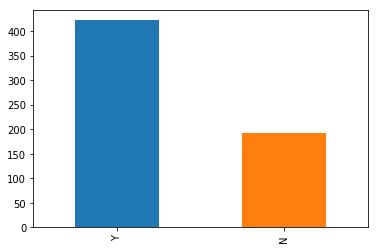

In [11]:
train["Loan_Status"].value_counts().plot.bar()

In [12]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

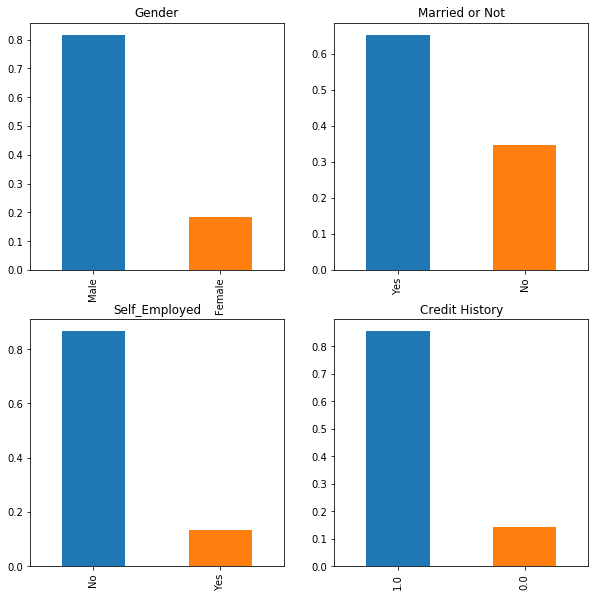

In [21]:
plt.figure(1)
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(10,10),title="Gender")

plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(title="Married or Not")

plt.subplot(223)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")

plt.subplot(224)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit History")

plt.show()

Text(0.5,0.98,'')

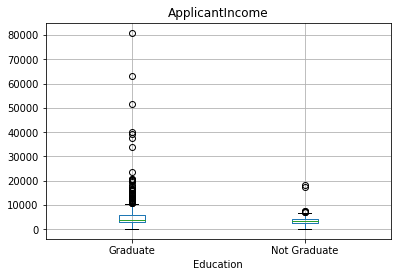

In [23]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

C:\Users\aspri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


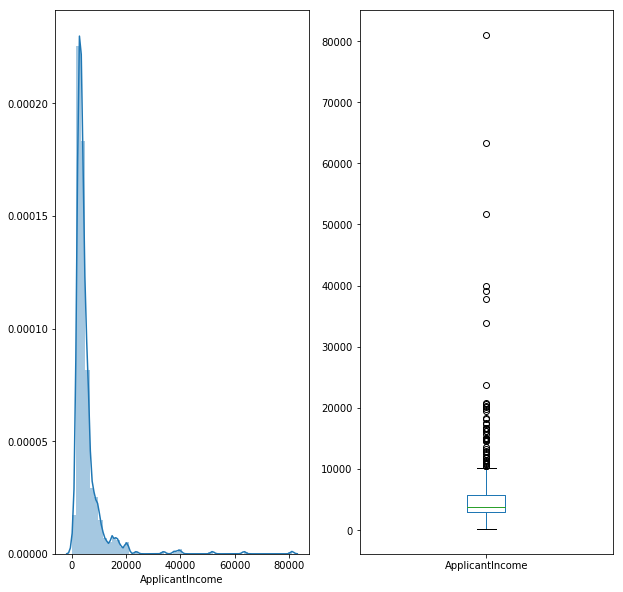

In [43]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"])

plt.subplot(122)
#train.plot(y="ApplicantIncome",kind="box")
train["ApplicantIncome"].plot.box(figsize=(10,10))

### BIVARIATE ANALYSIS

INDEPENDENT CATEGORICAL VS TARGET VARIABLE

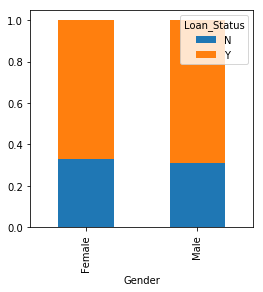

In [63]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [148]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


INDEPENDENT NUMERIC VS TARGET VARIABLE

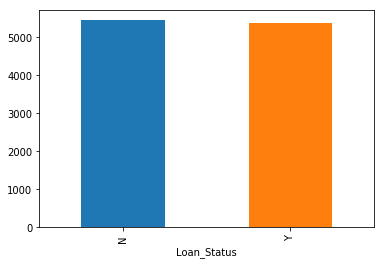

In [84]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [86]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

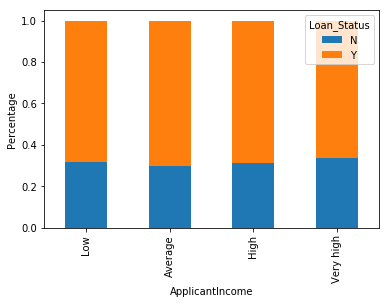

In [88]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [123]:
bins=[0,1000,3000,42000]

groups=["low","average","high"]

train["CoIncome bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=groups)

In [124]:
coapplicant_income=pd.crosstab(train["CoIncome bin"],train["Loan_Status"])

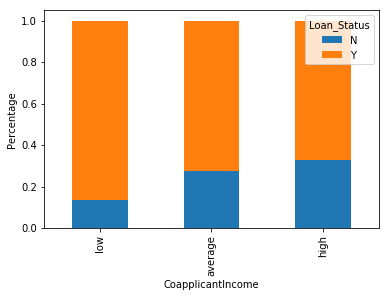

In [125]:
coapplicant_income.div(coapplicant_income.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [130]:
train["Total_income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
bins=[0,2500,4000,6000,81000]
groups=["low","average","high","very high"]
train["Total_Income_bin"]=pd.cut(train["Total_income"],bins,labels=groups)

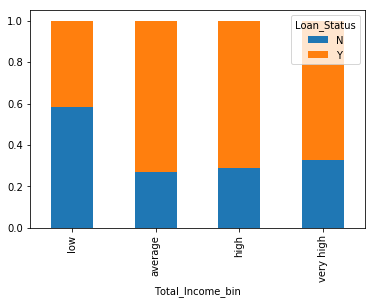

In [132]:
total_income=pd.crosstab(train["Total_Income_bin"],train["Loan_Status"])
total_income.div(total_income.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)


In [133]:
train=train.drop(columns=["Income_bin","CoIncome bin","Total_income","Total_Income_bin"],axis=1)

In [129]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,7024.705081
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


In [213]:
train["Loan_Status"]=train["Loan_Status"].map({"N":0,"Y":1})
train["Dependents"].replace("3+","3",inplace=True)

# different way of mapping label to numeric
# train['Loan_Status'].replace('N', 0,inplace=True)   
# train['Loan_Status'].replace('Y', 1,inplace=True)

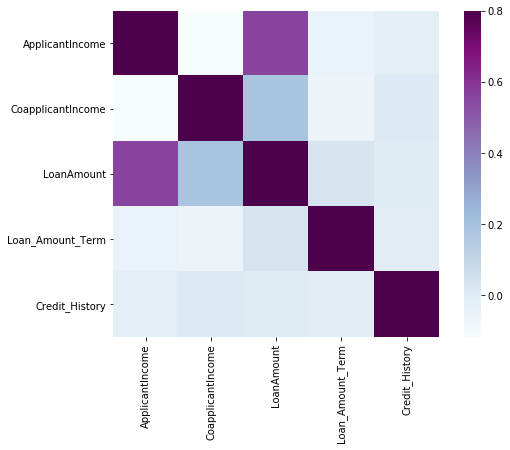

In [147]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

### HANDLING MISSING VALUES

In [215]:
for i in train.columns:
    if train[i].dtype == "object":
        if train[i].isna().sum() >0:
            train[i]=train[i].fillna(train[i].mode()[0])
    if train[i].dtype == "int64" or train[i].dtype == "float64":
        if train[i].isna().sum() >0:
            train[i]=train[i].fillna(train[i].median())

### HANDLING OUTLIERS

In [216]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [217]:
train=train.drop(columns=["Loan_ID"],axis=0)

In [218]:
train_copy=train

In [219]:
train=pd.get_dummies(train)

In [164]:
# obj=train.select_dtypes(include=["object"]).copy()

# obj=obj.drop(columns=["Loan_Status"],axis=1)

# obj_col=obj.columns

# for colname in obj_col:
#     obj=pd.get_dummies(obj, columns=[colname])

In [221]:
train.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [166]:
# train=train.drop(columns=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],axis=1)

# train=train.join(obj)

In [222]:

y=train.Loan_Status

train=train.drop(columns=["Loan_Status"],axis=1)

X=train.values

In [226]:
from sklearn.cross_validation import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,y, test_size =0.3)

In [202]:
logmodel=LogisticRegression()

In [227]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [229]:
y_pred=logmodel.predict(X_cv)

In [230]:
from sklearn.metrics import accuracy_score,recall_score

In [231]:
print("accuracy\n",accuracy_score(y_cv,y_pred))

accuracy
 0.8162162162162162


### BUILDING A 2ND MODEL WITH STRATIFIED K FOLD CV

In [245]:
from sklearn.model_selection import StratifiedKFold
i=1
X=train

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


In [175]:
def preprocessing_code(x):
    """returns preprocessed test data"""
    from sklearn.linear_model import LogisticRegression
    import pandas as pd
    import numpy as np
    from sklearn.metrics import recall_score,classification_report
    
    for i in x.columns:
        if x[i].dtype == "object":
            if x[i].isna().sum() >0:
                x[i]=x[i].fillna(x[i].mode()[0])
        if x[i].dtype == "int64" or x[i].dtype == "float64":
            if x[i].isna().sum() >0:
                x[i]=x[i].fillna(x[i].median())
    
    
    x=x.drop(columns=["Loan_ID"],axis=0)
    
    obj=x.select_dtypes(include=["object"]).copy()

    #obj=obj.drop(columns=["Loan_Status"],axis=1)

    obj_col=obj.columns

    for colname in obj_col:
        obj=pd.get_dummies(obj, columns=[colname])
        
    x=x.drop(columns=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],axis=1)

    x=x.join(obj)
    
    
    #x["Loan_Status"]=x["Loan_Status"].map({"N":0,"Y":1})


    #y_x=x.loc[:,"Loan_Status"].values

    #x=x.drop(columns=["Loan_Status"],axis=1)

    x=x.values
    
    
#     y_pred=logmodel(x)
#     print("classificaion report",classification_report(y_pred,y_x))
    return x
    
    
    
    
    

    
    
    

In [176]:
test=preprocessing_code(test)

In [177]:
def driver_code(train,y_train,test):
    from sklearn.linear_model import LogisticRegression
    logmodel=LogisticRegression()
    logmodel.fit(train,y_train)
    y_pred=logmodel.predict(test)
    return y_pred

In [178]:
y_test=driver_code(train,y_train,test)

In [179]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [199]:
finaldata=pd.read_csv("../dataset/loan_prediction_problem/test.csv")

In [233]:
Loan_ID=finaldata[:,].values

In [234]:
result=pd.DataFrame(data={"Loan_ID":Loan_ID,"Loan_Status":y_test})

In [239]:
result["Loan_Status"]=result["Loan_Status"].map({0:"N",1:"Y"})

In [ ]:
result

In [241]:
result.to_csv("loan_prediction_result.csv",index=None)